In [1]:
%load_ext autoreload
%autoreload 2

>> #### Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os

>> #### Import required modules

In [63]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from load_data import LoadData
from preprocess import Preprocess
from plot import Plot

Initialize loaddata, plot class

In [64]:
loader = LoadData()
preprocess = Preprocess()
plot = Plot()

Load datasets from csv files

In [5]:
# # Get URL from DVC
# path = 'data/AdSmartABdata.csv'
# repo = 'https://github.com/jedisam/abtest-mlops'
# version = '6db449393c9626c4fbca44946dfa103660685a27'

In [65]:
train_df = loader.read_csv('../data/train.csv')
test_df = loader.read_csv('../data/test.csv')
store_df = loader.read_csv('../data/store.csv')
sub_df = loader.read_csv('../data/sample_submission.csv')

/tmp/ipykernel_6651/546756437.py:1: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  train_df = loader.read_csv('../data/train.csv')


>> Data overview of each dataset

In [66]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


There is no missing data in the training set.

In [67]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [68]:
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [69]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [70]:
train_df.shape

(1017209, 9)

In [64]:
store_df.shape

(1115, 10)

In [65]:
test_df.shape

(41088, 8)

Store is a separate table from the sales data, so we need to join the two it with train_df

In [71]:
train_joined = preprocess.join_dataframes(train_df, store_df, 'Store', 'left')
test_joined = preprocess.join_dataframes(test_df, store_df, 'Store', 'left')

Get overview of merged Data

In [8]:
train_joined.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [68]:
test_joined.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,857,1,3,2015-09-16,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1713,1,2,2015-09-15,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,2569,1,1,2015-09-14,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,3425,1,7,2015-09-13,0.0,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


Change date column to datetime

In [72]:
# Change the date column to datetime
train_joined = preprocess.convert_to_datetime(train_joined, 'Date')
test_joined = preprocess.convert_to_datetime(test_joined, 'Date')

Extract relevant fields from Date column

In [73]:
train_joined = preprocess.extract_fields_date(train_joined, 'Date')
test_joined = preprocess.extract_fields_date(test_joined, 'Date')

/home/jedi/Documents/Tenacademy/Week3/sales-prediction/scripts/preprocess.py:133: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Get missing data percentage."""


In [74]:
train_joined.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,weekday,weekofyear,weekend
0,1,4,2015-07-31,5263,555,1,1,0,1,c,...,0,NaN,NaN,NaN,2015,7,31,4,31,0
1,1,3,2015-07-30,5020,546,1,1,0,1,c,...,0,NaN,NaN,NaN,2015,7,30,3,31,0
2,1,2,2015-07-29,4782,523,1,1,0,1,c,...,0,NaN,NaN,NaN,2015,7,29,2,31,0
3,1,1,2015-07-28,5011,560,1,1,0,1,c,...,0,NaN,NaN,NaN,2015,7,28,1,31,0
4,1,0,2015-07-27,6102,612,1,1,0,1,c,...,0,NaN,NaN,NaN,2015,7,27,0,31,1


Use the Date as an index

In [75]:
train_joined.set_index('Date', inplace=True)
test_joined.set_index('Date', inplace=True)

In [18]:
train_joined.to_csv('../data/train_joined.csv', index=True)
test_joined.to_csv('../data/test_joined.csv', index=True)

In [76]:
train_df = loader.read_csv('../data/train_joined.csv')
test_df = loader.read_csv('../data/test_joined.csv')

>> Get missing Data Overview

In [77]:
# Missing data in the train data
preprocess.get_missing_data_percentage(train_df)

,Total,%
PromoInterval,508031,49.9
Promo2SinceYear,508031,49.9
Promo2SinceWeek,508031,49.9
CompetitionOpenSinceMonth,323348,31.8
CompetitionOpenSinceYear,323348,31.8
CompetitionDistance,2642,0.3
weekofyear,0,0.0
weekday,0,0.0
Day,0,0.0
Month,0,0.0


In [78]:
# Missing Data in the test data
preprocess.get_missing_data_percentage(test_df)

,Total,%
PromoInterval,17232,41.9
Promo2SinceYear,17232,41.9
Promo2SinceWeek,17232,41.9
CompetitionOpenSinceMonth,15216,37.0
CompetitionOpenSinceYear,15216,37.0
CompetitionDistance,96,0.2
Open,11,0.0
Promo2,0,0.0
weekofyear,0,0.0
weekday,0,0.0


There are lots of missing values in the train and test data, so we need to handle them.

In [23]:
# train_df.dtypes 
# PromoInterval(Object), Promo2SinceYear(float64), Promo2SinceWeek(float64), CompetitionOpenSinceMonth(float64), CompetitionOpenSinceYear(float64), CompetitionDistance(float64), Open(float64)

 PromoInterval(Object), Promo2SinceYear(float64), Promo2SinceWeek(float64), CompetitionOpenSinceMonth(float64), CompetitionOpenSinceYear(float64), CompetitionDistance(float64) are missing values in the train data.

 Open(float64) is missing in the test data in addition to the other missing values.

In [79]:
missing_df = train_df[['PromoInterval', 'Promo2SinceYear', 'Promo2SinceWeek', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'CompetitionDistance', 'Open']]
missing_df.head(10)

,PromoInterval,Promo2SinceYear,Promo2SinceWeek,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,CompetitionDistance,Open
0,NaN,NaN,NaN,9.0,2008.0,1270.0,1
1,NaN,NaN,NaN,9.0,2008.0,1270.0,1
2,NaN,NaN,NaN,9.0,2008.0,1270.0,1
3,NaN,NaN,NaN,9.0,2008.0,1270.0,1
4,NaN,NaN,NaN,9.0,2008.0,1270.0,1
5,NaN,NaN,NaN,9.0,2008.0,1270.0,0
6,NaN,NaN,NaN,9.0,2008.0,1270.0,1
7,NaN,NaN,NaN,9.0,2008.0,1270.0,1
8,NaN,NaN,NaN,9.0,2008.0,1270.0,1
9,NaN,NaN,NaN,9.0,2008.0,1270.0,1


Fill 'Promo2SinceYear', 'Promo2SinceWeek', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'CompetitionDistance' with mean values

In [80]:
miss_1 = ['Promo2SinceYear', 'Promo2SinceWeek', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'CompetitionDistance']
train_df = preprocess.fill_missing_median(train_df, miss_1)
test_df = preprocess.fill_missing_median(test_df, miss_1)

Fill 'Open' with 0 in test data

In [81]:
test_df = preprocess.fill_missing_with_zero(test_df, ['Open'])

Fill 'PromoInterval' with mode values

In [82]:
train_df = preprocess.fill_missing_mode(train_df, ['PromoInterval'])
test_df = preprocess.fill_missing_mode(test_df, ['PromoInterval'])

Get overview of missing values

In [83]:
preprocess.get_missing_data_percentage(train_df)

,Total,%
Date,0,0.0
Store,0,0.0
weekofyear,0,0.0
weekday,0,0.0
Day,0,0.0
Month,0,0.0
Year,0,0.0
PromoInterval,0,0.0
Promo2SinceYear,0,0.0
Promo2SinceWeek,0,0.0


In [84]:
preprocess.get_missing_data_percentage(test_df)

,Total,%
Date,0,0.0
CompetitionOpenSinceYear,0,0.0
weekofyear,0,0.0
weekday,0,0.0
Day,0,0.0
Month,0,0.0
Year,0,0.0
PromoInterval,0,0.0
Promo2SinceYear,0,0.0
Promo2SinceWeek,0,0.0


>> Handling outliers

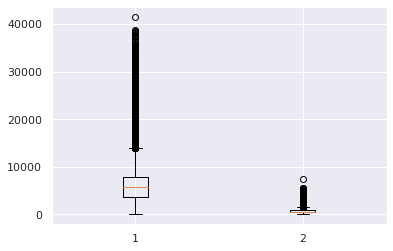

In [85]:
sns.set()
plt.boxplot(train_df[['Sales', 'Customers']])
plt.show()

In [86]:
# Replace Outliers with IQR
df = preprocess.replace_outliers_iqr(train_df, ['Sales', 'Customers'])

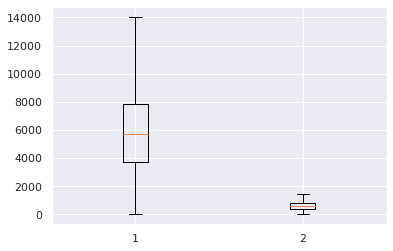

In [87]:
sns.set()
plt.boxplot(train_df[['Sales', 'Customers']])
plt.show()

>> Converting "CompetitionOpenSinceYear/Month" to Milliseconds

In [88]:
train_df.head()

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,weekday,weekofyear,weekend
0,2015-07-31,1,4,5263.0,555.0,1,1,0,1,c,...,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2015,7,31,4,31,0
1,2015-07-30,1,3,5020.0,546.0,1,1,0,1,c,...,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2015,7,30,3,31,0
2,2015-07-29,1,2,4782.0,523.0,1,1,0,1,c,...,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2015,7,29,2,31,0
3,2015-07-28,1,1,5011.0,560.0,1,1,0,1,c,...,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2015,7,28,1,31,0
4,2015-07-27,1,0,6102.0,612.0,1,1,0,1,c,...,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2015,7,27,0,31,1


Drop Customers column from training data because it is not present in the test data

In [89]:
train_df.drop('Customers',inplace = True, axis=1)  #Because it is not in the test set

>> Label Encoding

Categorical Columns are: PromoInterval, Assortment, StoreType

In [97]:
categorical_columns = ['PromoInterval', 'Assortment', 'StoreType']

# Label encoding
label_encoded_columns = preprocess.label_encode(train_df, categorical_columns)

In [100]:
train_df.drop(categorical_columns, axis=1, inplace=True)

# Merge DataFrames
train_df = pd.concat([train_df, label_encoded_columns], axis=1)

In [101]:
train_df.dtypes

Date                          object
Store                          int64
DayOfWeek                      int64
Sales                        float64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
Year                           int64
Month                          int64
Day                            int64
weekday                        int64
weekofyear                     int64
weekend                        int64
PromoInterval                  int64
Assortment                     int64
StoreType                      int64
dtype: object

In [105]:
train_df.sort_values(["Store"], ignore_index=True, inplace=True)
test_df.sort_values(["Store"], ignore_index=True, inplace=True)
train_df.sort_values(["Year","Month","Day"], ascending=False ,ignore_index=True, inplace=True)
test_df.sort_values(["Year","Month","Day"], ascending=False ,ignore_index=True, inplace=True)

>> Get the correlation matrix for the target variable

In [106]:
corr_matrix = train_df.corr()
corr_matrix["Sales"].sort_values(ascending=False)

Sales                        1.000000
Open                         0.715977
Promo                        0.468557
SchoolHoliday                0.088484
Assortment                   0.074635
weekofyear                   0.050223
Month                        0.045805
Promo2SinceWeek              0.033582
Year                         0.025718
CompetitionOpenSinceYear     0.008260
Store                        0.003404
Promo2SinceYear             -0.004713
PromoInterval               -0.004929
StoreType                   -0.004961
Day                         -0.011411
CompetitionDistance         -0.012095
CompetitionOpenSinceMonth   -0.020931
Promo2                      -0.084233
weekend                     -0.279645
DayOfWeek                   -0.481886
weekday                     -0.481886
Name: Sales, dtype: float64

>> Save train and test data

In [107]:
train_df.to_csv('../data/train_processed.csv', index=True)
test_df.to_csv('../data/test_processed.csv', index=True)